In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [3]:
# Load data
data = pd.read_csv(r"C:\Users\Dell\Downloads\depression_analysis.csv")

In [4]:
data.head()

,Do you feel bored or uninterested in activities?,Do you feel sad or hurt?,Do you stay up late at night?,Do you feel tired all the time?,Do you feel like there is nobody to help you?,Do you feel your parents are upset with you?,Do you leave food because you are not hungry?,Do you feel distracted while studying?,Do you feel like disappearing from the world?,Depression Risk
0,0,0,2,2,3,2,3,1,0,Moderate Depression Risk
1,1,2,3,2,3,3,3,3,2,Severe Depression Risk
2,3,0,3,1,3,1,2,2,1,Moderate to Severe Depression Risk
3,3,3,1,0,3,3,0,0,1,Moderate Depression Risk
4,2,3,0,3,2,1,3,1,2,Moderate to Severe Depression Risk


In [5]:
# Extracting categorical columns
categorical_cols = [
    'Do you feel bored or uninterested in activities?',
    'Do you feel sad or hurt?',
    'Do you stay up late at night?',
    'Do you feel tired all the time?',
    'Do you feel like there is nobody to help you?',
    'Do you feel your parents are upset with you?',
    'Do you leave food because you are not hungry?',
    'Do you feel distracted while studying?',
    'Do you feel like disappearing from the world?'
]

In [6]:
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data[categorical_cols])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# Create a DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded features with original data
data_encoded = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

In [8]:
# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=['Depression Risk'])
y = data_encoded['Depression Risk']

In [9]:
# Integer encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax') 
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

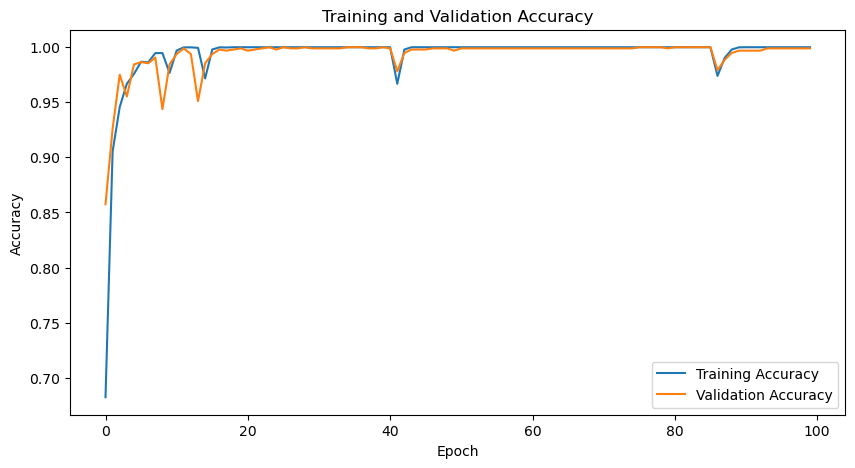

In [14]:
# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

76/76 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9963
Test Accuracy: 0.9962546825408936


In [16]:
# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

76/76 [==============================] - 0s 2ms/step


In [17]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Confusion Matrix:
[[ 287    0    0    0    0]
 [   0    9    0    0    0]
 [   0    0 1160    1    0]
 [   0    0    1  853    7]
 [   0    0    0    0   85]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00      1161
           3       1.00      0.99      0.99       861
           4       0.92      1.00      0.96        85

    accuracy                           1.00      2403
   macro avg       0.98      1.00      0.99      2403
weighted avg       1.00      1.00      1.00      2403



In [18]:
# Save the trained model
model.save('ffnn_model.h5')

# Save the OneHotEncoder
joblib.dump(encoder, 'one_hot_encoderffnn.pkl')

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['one_hot_encoderffnn.pkl']

Testing

In [23]:
import pandas as pd
import joblib
import numpy as np
import tensorflow as tf

# Load the saved neural network model
loaded_model = tf.keras.models.load_model('ffnn_model.h5')

# Load the saved OneHotEncoder
loaded_encoder = joblib.load('one_hot_encoderffnn.pkl')

# Prepare the input data
input_data = pd.DataFrame({
    'Do you feel bored or uninterested in activities?': [3],
    'Do you feel sad or hurt?': [1],
    'Do you stay up late at night?': [0],
    'Do you feel tired all the time?': [1],
    'Do you feel like there is nobody to help you?': [0],
    'Do you feel your parents are upset with you?': [0],
    'Do you leave food because you are not hungry?': [2],
    'Do you feel distracted while studying?': [1],
    'Do you feel like disappearing from the world?': [3]
})

# One-hot encode the input data
encoded_input = loaded_encoder.transform(input_data)

# Make predictions
predictions_prob = loaded_model.predict(encoded_input)
predictions = np.argmax(predictions_prob, axis=1)

# Inverse transform the predicted labels to get the actual class labels
predicted_labels = label_encoder.inverse_transform(predictions)

print("Predicted Labels:", predicted_labels)

1/1 [==============================] - 0s 94ms/step
Predicted Labels: ['Moderate Depression Risk']
